# Image Pipeline Analysis and Tests: Phase 2


# Part 1:


### Question:
Using your code from Phase 1, add the parsing of the o-contours into your pipeline. Note that there are only half the number of o-contour files as there are i-contour files, so not every i-contour will have a corresponding o-contour.

After building the pipeline, please discuss any changes that you made to the pipeline you built in Phase 1, and why you made those changes.

### Answer:

- I kept the classes from Phase 1 in order to run previous code. However, I updated them (see below).
- I created a DicomContourReader2 that parses both i-contour and o-contour files.
- I created a ImagePipeline2 that uses DicomContourReader2 and creates batches for both contours. I also added a method that return the complete data set.

- In order to re-use existing and share code from Phase 1, I updated the class structure:
    - Super class DicomContourReaderBase contains general methods for DicomContourReader and DicomContourReader2
    - Super class ImagePipelineBase contains general methods for ImagePipeline and ImagePipeline2


In addition:
- added method to collect file list
- removed unnecessary code
- added method to ImageTools to get contour mask
- added method to match contours
- updated DicomReaderContour
- updated ImagePipline

All code was tested.


In [2]:
import dicom
from dicom.errors import InvalidDicomError

import numpy as np
from PIL import Image, ImageDraw

import os,csv

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from ImagePipeline_v2 import ImageTools, DicomReader, DicomContourReader, DicomContourReader2
from ImagePipeline_v2 import ImagePipeline, ImagePipeline2

In [4]:
#!ls

### Test DicomReader

In [12]:
dcmPath  = 'final_data/dicoms/SCD0000101/'
contPath = 'final_data/contourfiles/SC-HF-I-1/'

d=DicomReader(dcmPath)
assert len(d.dcmFileList) == 240

i_dc = DicomContourReader(dcmPath,os.path.join(contPath,'i-contours'))
assert len( i_dc.getAllFilePairs() )==18

o_dc = DicomContourReader(dcmPath,os.path.join(contPath,'o-contours'))
assert len( o_dc.getAllFilePairs() )==9

Found 240 dcm images
Found 240 dcm images
Found 18 contour files
Found 240 dcm images
Found 9 contour files


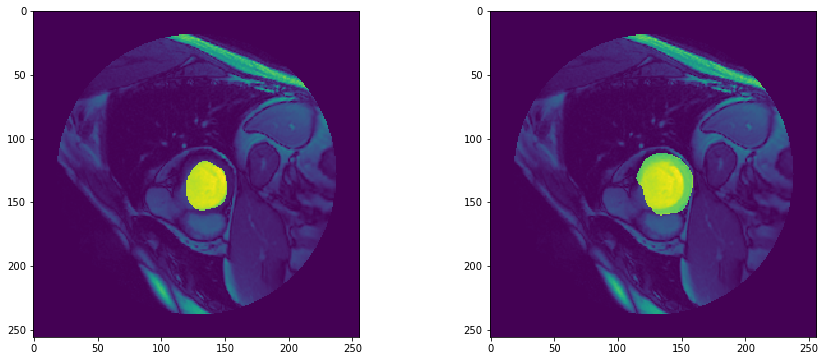

In [14]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
ima,mask = i_dc.getDicomImageAndMask('0059')
plt.imshow(800*np.array(mask)+np.array(ima))

plt.subplot(1,2,2)
ima,mask = o_dc.getDicomImageAndMask('0059')
_=plt.imshow(800*np.array(mask)+np.array(ima))

In [15]:
o_dc.getAllFilePairs()

[('final_data/dicoms/SCD0000101/59.dcm',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0059-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/79.dcm',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0079-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/99.dcm',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0099-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/119.dcm',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0119-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/139.dcm',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0139-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/159.dcm',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0159-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/179.dcm',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0179-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/199.dcm',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0199-ocontour-manual.tx

## Test DicomContourReader2

In [16]:
dcmPath  = 'final_data/dicoms/SCD0000101/'
contPath = 'final_data/contourfiles/SC-HF-I-1/'

dc = DicomContourReader2(dcmPath,contPath)
assert len( dc.getAllFilePairs() )==9

Found 240 dcm images
Found 9 contour files


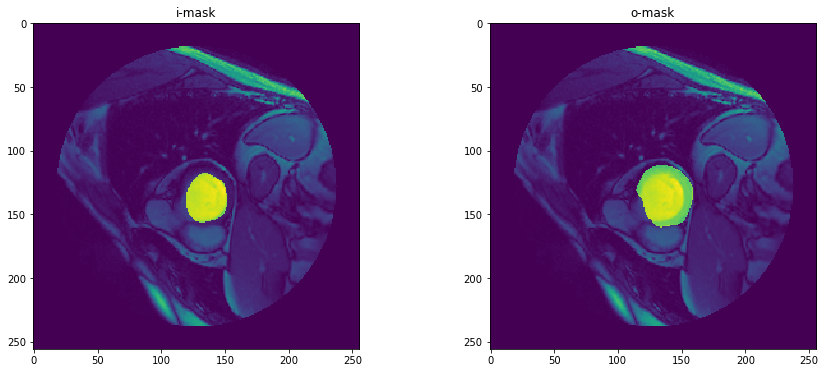

In [17]:
ima,imask,omask = dc.getDicomImageAndMask('0059')

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.imshow(800*np.array(imask)+np.array(ima))
plt.title('i-mask')

plt.subplot(1,2,2)
ima,mask = o_dc.getDicomImageAndMask('0059')
plt.imshow(800*np.array(omask)+np.array(ima))
_=plt.title('o-mask')

In [18]:
dc.getAllFilePairs()

[('final_data/dicoms/SCD0000101/59.dcm',
  'final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0059-icontour-manual.txt',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0059-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/79.dcm',
  'final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0079-icontour-manual.txt',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0079-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/99.dcm',
  'final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0099-icontour-manual.txt',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0099-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/119.dcm',
  'final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0119-icontour-manual.txt',
  'final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0119-ocontour-manual.txt'),
 ('final_data/dicoms/SCD0000101/139.dcm',
  'final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-0139-icontour-manual.txt',
  'final_data/contourfiles/SC-HF-I-1/o-con

### Test Image Pipeline 2

In [19]:
np.random.seed(1234)
ip = ImagePipeline2('final_data/dicoms/','final_data/contourfiles/','final_data/link.csv')

assert(ip._ndata==46)

SCD0000101 final_data/dicoms/SCD0000101 final_data/contourfiles/SC-HF-I-1
Found 240 dcm images
Found 9 contour files
SCD0000201 final_data/dicoms/SCD0000201 final_data/contourfiles/SC-HF-I-2
Found 260 dcm images
Found 9 contour files
SCD0000301 final_data/dicoms/SCD0000301 final_data/contourfiles/SC-HF-I-4
Found 200 dcm images
Found 10 contour files
SCD0000401 final_data/dicoms/SCD0000401 final_data/contourfiles/SC-HF-I-5
Found 220 dcm images
Found 9 contour files
SCD0000501 final_data/dicoms/SCD0000501 final_data/contourfiles/SC-HF-I-6
Found 220 dcm images
Found 9 contour files
Total # files: 46


In [20]:
# check batch sampling 
for k in range(10):
    print ip.getNextBatchIndices()

[40, 35, 45, 25, 8, 14, 4, 21]
[10, 17, 13, 1, 36, 29, 42, 37]
[27, 20, 32, 0, 11, 7, 3, 6]
[2, 34, 43, 33, 18, 41, 22, 31]
[9, 16, 5, 28, 39, 44, 30, 26]
[40, 28, 17, 30, 5, 33, 35, 41]
[1, 26, 13, 19, 18, 22, 39, 2]
[12, 25, 8, 21, 16, 38, 15, 45]
[42, 7, 32, 20, 37, 0, 43, 24]
[3, 4, 10, 27, 11, 34, 23, 44]


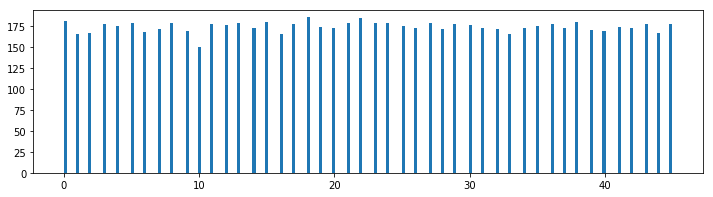

In [21]:
# check if batch sampling is uniform across data points
tmp =[]
for k in range(1000):
    tmp+= ip.getNextBatchIndices()
    
plt.figure(figsize=(12,3))
_=plt.hist(tmp,bins=200)

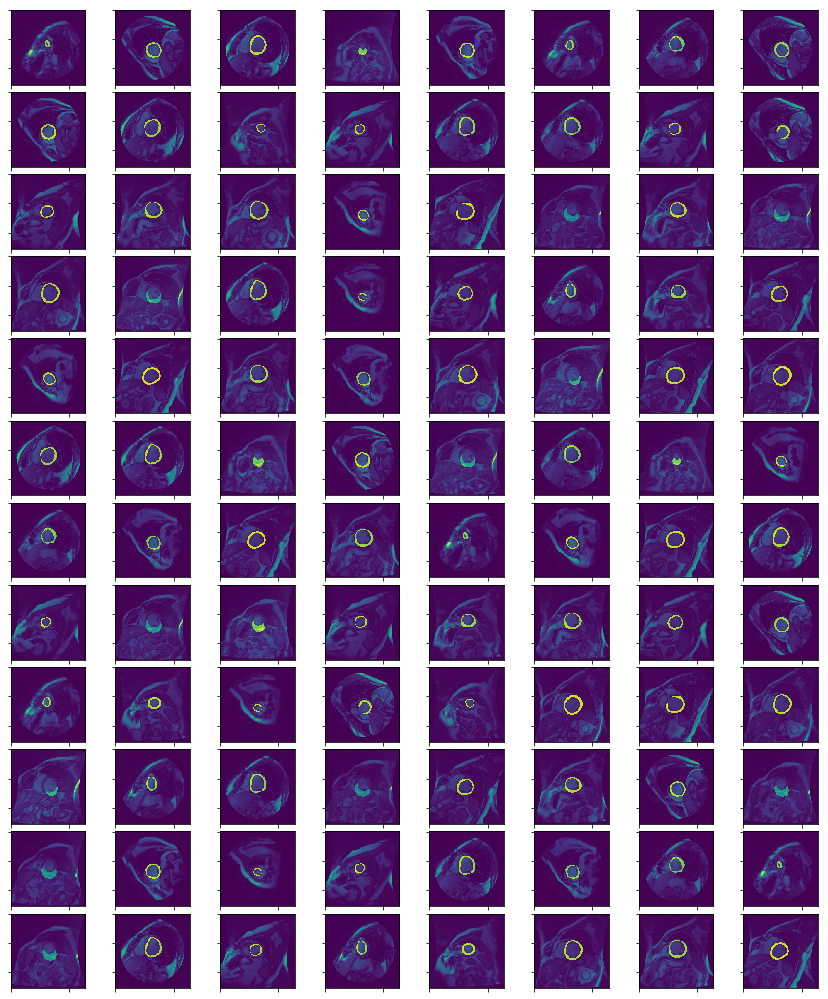

In [22]:
# visualize batches

pcnt=0
plt.figure(figsize=(15,18))
for ib in range(12):
    ima,imask,omask = ip.getNextBatch()
    bsize = ip.batchSize
    for k in range(bsize):
        pcnt+=1
        ax=plt.subplot(12,bsize,pcnt)
        lv = omask[k] & ~imask[k]
        plt.imshow(ima[k]+1000*lv)
        ax.set_xticklabels(())
        ax.set_yticklabels(())
plt.subplots_adjust(hspace = .1, wspace = .001)

# Part 2

# Question 2.1.

Let’s assume that you want to create a system to outline the boundary of the blood pool (i-contours), and you already know the outer border of the heart muscle (o-contours). Compare the differences in pixel intensities inside the blood pool (inside the i-contour) to those inside the heart muscle (between the i-contours and o-contours); could you use a simple thresholding scheme to automatically create the i-contours, given the o-contours? Why or why not? Show figures that help justify your answer.

#### Answer:

No, a single, global threshold would not lead to good segmentation results. Although the pixel distribution in each image is bi-modal for the i-contours and the LV regions, a good single, global threshold for all images cannot be found due to the variations in the MRI images (Pixel intensities cannot be compared across images) and inconsistent tissue properties. See Figure 2.1.1 for some example histograms.

To quantify the segmenation results, the commonly used Dice Index is used.

Creating a histogram for all pixel in the data set in Figure 2.1.2, a the best global threshold would have an intensity of ~130 with a Dice score of 0.732 (see Figure 2.1.3)

If one looks at the Dice distribution of individual images in Figure 2.1.4, the median Dice score is 0.762 and the 5%-95% percentile is [ 0.293, 0.903]. This shows that the segmentation results strongly varies from image to image.

In addition, this means that the segmentation is poor for at least half of the images and there are hardly any images where the results are acceptable.

Note that one could improve the results using e.g. noise filtering and morphological operations. However, these results would be marginal and would not change the conclusion.


In [24]:
# load data

np.random.seed(1234)
ip = ImagePipeline2('final_data/dicoms/','final_data/contourfiles/','final_data/link.csv')

ima, imask, omask = ip.getAllData()
print ima.shape, imask.shape, omask.shape

SCD0000101 final_data/dicoms/SCD0000101 final_data/contourfiles/SC-HF-I-1
Found 240 dcm images
Found 9 contour files
SCD0000201 final_data/dicoms/SCD0000201 final_data/contourfiles/SC-HF-I-2
Found 260 dcm images
Found 9 contour files
SCD0000301 final_data/dicoms/SCD0000301 final_data/contourfiles/SC-HF-I-4
Found 200 dcm images
Found 10 contour files
SCD0000401 final_data/dicoms/SCD0000401 final_data/contourfiles/SC-HF-I-5
Found 220 dcm images
Found 9 contour files
SCD0000501 final_data/dicoms/SCD0000501 final_data/contourfiles/SC-HF-I-6
Found 220 dcm images
Found 9 contour files
Total # files: 46
(46, 256, 256) (46, 256, 256) (46, 256, 256)


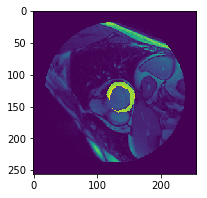

In [27]:
# test
im, imsk, omsk = ima[0], imask[0], omask[0]
plt.figure(figsize=(3,3))
_=plt.imshow(im+ 800*(~imsk & omsk))

### Figure 2.1.1

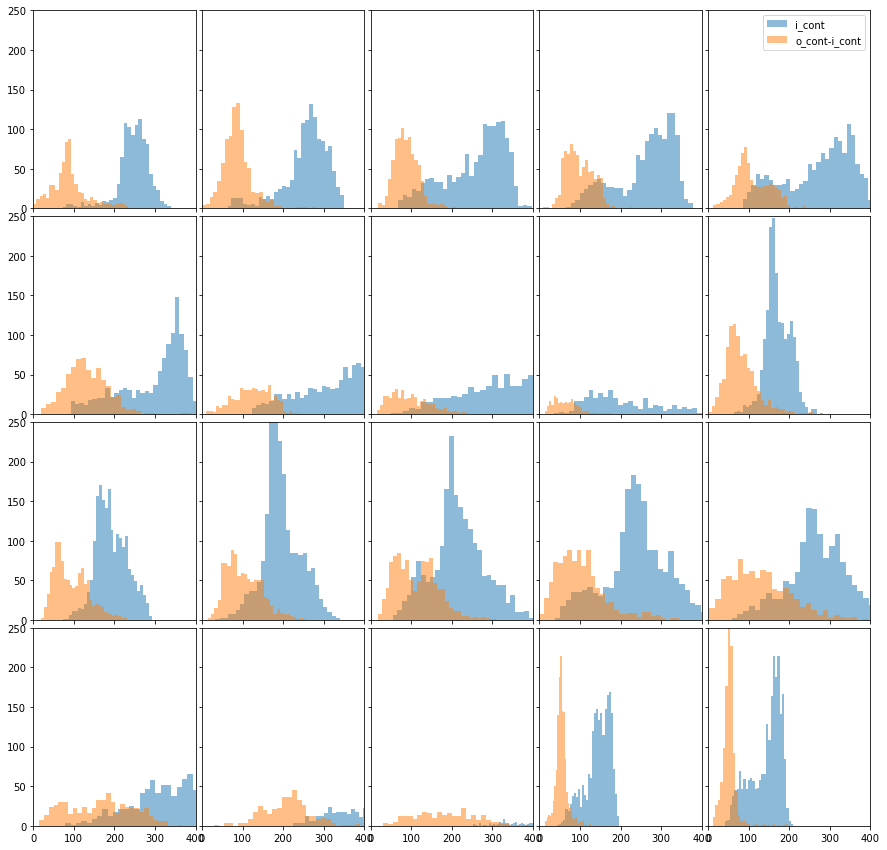

In [289]:
plt.figure(figsize=(15,15))
for k in range(20):
    im = ima[k]
    imsk = imask[k]
    dmsk = omask[k] & ~imask[k]

    ax=plt.subplot(4,5,k+1)
    _=plt.hist(im[imsk].flatten(),bins=30,alpha=0.5,label='i_cont')
    _=plt.hist(im[dmsk].flatten(),bins=30,alpha=0.5,label='o_cont-i_cont')
    plt.xlim(0,400)
    plt.ylim(0,250)
    
    if k==4:
        plt.legend()
    
    if k<15: 
        ax.set_xticklabels([])
    if k%5:
        ax.set_yticklabels([])
plt.subplots_adjust(wspace=0.04, hspace=0.04)

### Figure 2.1.2

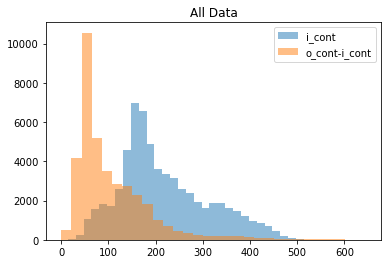

In [293]:
# Pixels from whole data set

dmask = omask & ~imask
_=plt.hist(ima[imask].flatten(),bins=30,alpha=0.5,label='i_cont')
_=plt.hist(ima[dmask].flatten(),bins=30,alpha=0.5,label='o_cont-i_cont')
plt.title('All Data')
_=plt.legend()


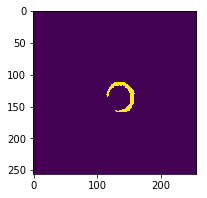

In [328]:
# test
im, imsk, omsk = ima[0], imask[0], omask[0]
plt.figure(figsize=(3,3))
plt.imshow(omsk & (im*omsk<120))

#### Dice Index Calculation

In [363]:
def dice(trueMask,predMask):
    intersect = sum((trueMask & predMask).flatten())
    total     = sum(trueMask.flatten())+sum(predMask.flatten())
    return 2.*intersect/total

### Figure 2.1.3

In [322]:
thresh = [110,120,130,140,150]
allDice = np.zeros(len(thresh))
for thr in range(len(thresh)):
    allDice[thr] = dice(~imask & omask, omask & (ima*omask<thresh[thr]) )

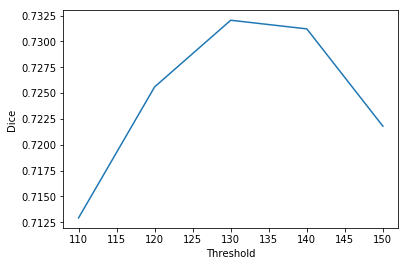

In [326]:
_=plt.plot(thresh,allDice)
plt.ylabel('Dice')
_=plt.xlabel('Threshold')

### Figure 2.1.4

In [336]:
thresh = 130
nima = len(ima)
allDice = np.zeros(nima)
for i in range(nima):
    im, imsk, omsk = ima[i], imask[i], omask[i]
    allDice[i] = dice(~imsk & omsk, omsk & (im*omsk<thresh) )

Median = 0.762272772885 , Percentiles=  [ 0.29298103  0.90345174]


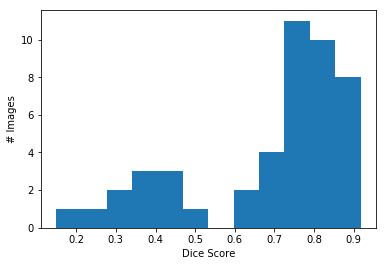

In [347]:
print "Median =", np.median(allDice), ", Percentiles= ", np.percentile(allDice,[5,95])

_=plt.hist(allDice,bins=12)
plt.ylabel('# Images')
_=plt.xlabel('Dice Score')

# Question 2.2

Do you think that any other heuristic (non-machine learning)-based approaches, besides simple thresholding, would work in this case? Explain.

### Answer:

Due to the inconsistent image qualities, a better approach may be to find a threshold of each image to separate the two pixel distributions.

In Figure 2.2.1, a threshold for each image is found based on a percentile of the pixel distribution in the o-contour area. A set of percentiles were tested. The Dice score was calculated for each image for a given pixel percentile. 
Good results were found for an o-contour percentile of 40%, which resulted in an median Dice score of 0.829 (0.678, 0.919). This is already a strong improvement from the global threshold method (0.762 [ 0.293, 0.903]).

However, as seen in Figure 2.2.2, even with this improvement the quality of the segmentation can be poor and does not follow the anatomical shapes. 

Another approach would be to use an unsupervised technique like k-means clustering or Otsu's method to separate the two pixel distributions.


### Figure 2.2.1

In [371]:
percent = [20,25,30,35,40,45,50,55,60] # pixel percentile in the o-contour area
nperc  = len(percent)
nima = len(ima)
allMedian = np.zeros(nperc)
allPercent = np.zeros((nperc,2))

for pidx in range(nperc):
    perc = percent[pidx]
    allDice = np.zeros(nima)
    for i in range(nima):
        im, imsk, omsk = ima[i], imask[i], omask[i]
        thresh = np.percentile(im[omsk], perc)

        allDice[i] = dice(~imsk & omsk, omsk & (im*omsk<thresh) )
    allMedian[pidx] =  np.median(allDice)    
    allPercent[pidx]=  np.percentile(allDice,[5,95])
    
    print 'Pixel Percentile= ',perc,'% : Median =', allMedian[pidx], ", Percentiles= ", allPercent[pidx]

Pixel Percentile=  20 % : Median = 0.638166127292 , Percentiles=  [ 0.41626309  0.72195273]
Pixel Percentile=  25 % : Median = 0.72918267798 , Percentiles=  [ 0.495269    0.80564077]
Pixel Percentile=  30 % : Median = 0.791817852642 , Percentiles=  [ 0.56758797  0.86833488]
Pixel Percentile=  35 % : Median = 0.823186816982 , Percentiles=  [ 0.62307082  0.91433448]
Pixel Percentile=  40 % : Median = 0.828673822611 , Percentiles=  [ 0.67781391  0.91887266]
Pixel Percentile=  45 % : Median = 0.809666498015 , Percentiles=  [ 0.72387215  0.90619791]
Pixel Percentile=  50 % : Median = 0.791707100001 , Percentiles=  [ 0.74287752  0.89804865]
Pixel Percentile=  55 % : Median = 0.781719953702 , Percentiles=  [ 0.71609322  0.87552742]
Pixel Percentile=  60 % : Median = 0.755652286922 , Percentiles=  [ 0.6865379   0.85682943]


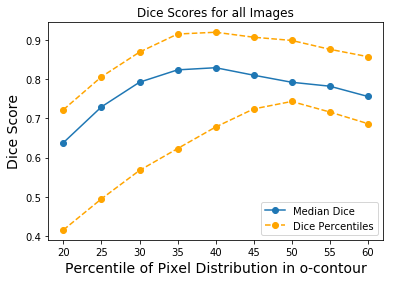

In [396]:
plt.plot(percent, allMedian,'o-',label='Median Dice')
plt.plot(percent, allPercent[:,0],'o--',color='orange',label='Dice Percentiles')
plt.plot(percent, allPercent[:,1],'o--',color='orange')
plt.title('Dice Scores for all Images')
plt.ylabel('Dice Score',fontsize=14)
plt.xlabel('Percentile of Pixel Distribution in o-contour',fontsize=14)
_=plt.legend()

### Figure 2.2.2

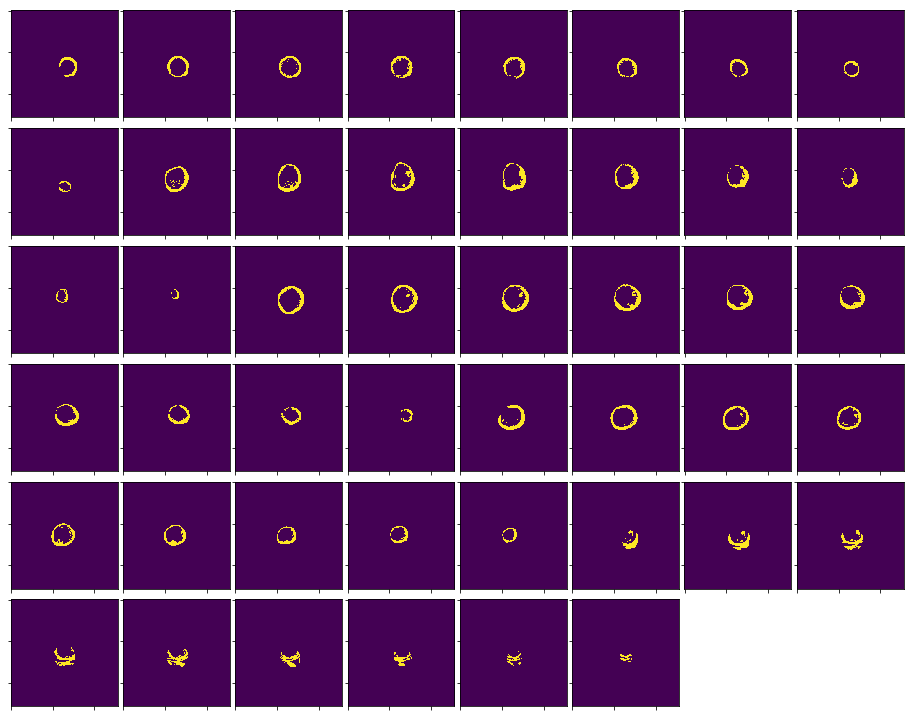

In [406]:
perc = 40

plt.figure(figsize=(16,13))

nima = len(ima)
for i in range(nima):
    im, imsk, omsk = ima[i], imask[i], omask[i]
    thresh = np.percentile(im[omsk], perc)

    trueMask= ~imsk & omsk
    predMask= omsk & (im*omsk<thresh) 
    
    ax=plt.subplot(6,8,i+1)
    plt.imshow(predMask)
    ax.set_xticklabels(())
    ax.set_yticklabels(())
plt.subplots_adjust(hspace = .001, wspace = .05)    